In [12]:
#this method of stacking bands assumes that your input layers share the same extent, resolution and data type

import rasterio

blue_fn = './BayAreaLandsat/LC08_L1TP_044034_20180329_20180405_01_T1_B2.TIF'
green_fn = './BayAreaLandsat/LC08_L1TP_044034_20180329_20180405_01_T1_B3.TIF'
red_fn = './BayAreaLandsat/LC08_L1TP_044034_20180329_20180405_01_T1_B4.TIF'

file_list = [blue_fn, green_fn, red_fn]

#read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta
    
#update meta data to reflect the number of layers
meta.update(count = len(file_list))

#read each layer and write it to a stack
with rasterio.open('./BayAreaLandsat/stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\rasterio\__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


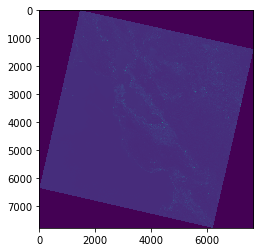

In [21]:
#visualize the stack tiff
import matplotlib.pyplot as plt
from rasterio.plot import plotting_extent

with rasterio.open('./BayAreaLandsat/stack.tif') as src:
    bay = src.read(1)

plt.imshow(bay)

# Stacking using Earthpy

In [11]:
import rasterio
import earthpy.spatial as es
import matplotlib.pyplot as plt
from rasterio.plot import plotting_extent

In [4]:
blue_fn = './BayAreaLandsat/LC08_L1TP_044034_20180329_20180405_01_T1_B2.TIF'
green_fn = './BayAreaLandsat/LC08_L1TP_044034_20180329_20180405_01_T1_B3.TIF'
red_fn = './BayAreaLandsat/LC08_L1TP_044034_20180329_20180405_01_T1_B4.TIF'

file_list = [blue_fn, green_fn, red_fn]

In [5]:
# Stack the landsat bands
es.stack_raster_tifs(file_list, './BayAreaLandsat/stack2.tif', arr_out=False)

In [34]:
# Read the landsat data
with rasterio.open('./BayAreaLandsat/stack2.tif') as src:
    landsat_bay = src.read(masked=True)
    landsat_extent = plotting_extent(src)
    meta=src.profile

In [35]:
# Explore the meta data

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7671, 'height': 7791, 'count': 3, 'crs': CRS({'init': 'epsg:32610'}), 'transform': Affine(30.0, 0.0, 462885.0,
       0.0, -30.0, 4264215.0), 'tiled': False, 'interleave': 'pixel'}

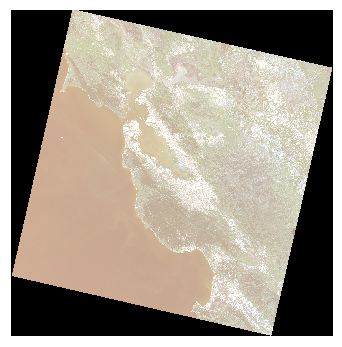

In [46]:
#visualize in color composite

landsat_rgb = [0,1,2]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

es.plot_rgb(landsat_bay,
           rgb=landsat_rgb,
           ax=ax,
           extent=landsat_extent,
           stretch=True)
ax.set_axis_off()
plt.show()